# Dataset Generation with Clements Physical Model

In [ ]:
import numpy as np

In [ ]:
'''
unitary matrices of physical model
'''
def P_14_create(c_0, a, x):
    c = c_0 + a @ x
    P = np.eye(4, dtype='complex64')
    P[0,0] = np.exp(1j*c[0])
    P[3,3] = np.exp(1j*c[1])
    return P

def P_2_create(c_0, a, x):
    c = c_0 + a * x
    P = np.eye(4, dtype='complex64')
    P[1,1] = np.exp(1j*c[0])
    return P

def P_3_create(c_0, a, x):
    c = c_0 + a * x
    P = np.eye(4, dtype='complex64')
    P[2,2] = np.exp(1j*c[0])
    return P

def DC(R_3):
    M = np.eye(2,dtype = 'complex64')
    M[0,0] = np.sqrt(R_3)
    M[0,1] = 1j*np.sqrt(1-R_3)
    M[1,1] = np.sqrt(R_3)
    M[1,0] = 1j*np.sqrt(1-R_3)
    return M

def U_1(R_1,R_2):
    M = np.eye(4,dtype='complex64')
    M[0:2,0:2] = DC(R_1)
    M[2:4,2:4] = DC(R_2)
    return M

def U_2(R_1):
    M = np.eye(4,dtype='complex64')
    M[1:3,1:3] = DC(R_1)
    return M


In [ ]:
'''
вспомогательная функция
'''
def interf1(I, x,
      f_1 = np.array([0.1566, 0.0396]),
f_2 = np.array([1.8388, 1.6334]),
f_3 = np.array([-0.2045]),
f_4 = np.array([-0.3984]),
f_5 = np.array([-0.01254, 0.1149]),
f_6 = np.array([-0.6691]),
a_1 = np.array([[2.7874, -0.4287], [-0.4827, 2.7510]]),
a_2 = np.array([[3.2306, -0.5611], [-0.6913, 3.1517]]),
a_3 = np.array(2.8812),
a_4 = np.array(3.2975),
a_5 = np.array([[3.0654, -0.5357], [-0.5380, 3.0873]]),
a_6 = np.array(3.3646),
R = np.array([0.37425, 0.4123, 0.3755, 0.3122, 0.3296, 0.4110, 0.4421, 0.3978, 0.2827, 0.3705, 0.4543, 0.4806]),
T_out = np.array([0.4701, 0.5567, 0.4799, 0.5566])):
    I_in = np.asarray(I)
    I_normed = I_in/np.sum(I_in)
    a_in = np.sqrt(I_normed, dtype = 'complex64')
    alpha_1 = a_1*1e-6
    alpha_2 = a_2*1e-6
    alpha_3 = a_3*1e-6
    alpha_4 = a_4*1e-6
    alpha_5 = a_5*1e-6
    alpha_6 = a_6*1e-6
    x_amperage = np.asarray(x)**2
    P1 = P_14_create(f_1, alpha_1, x_amperage[0:2])
    P2 = P_14_create(f_2, alpha_2, x_amperage[2:4])
    P3 = P_2_create(f_3, alpha_3, x_amperage[4])
    P4 = P_3_create(f_4, alpha_4, x_amperage[5])
    P5 = P_14_create(f_5, alpha_5, x_amperage[6:8])
    P6 = P_2_create(f_6, alpha_6, x_amperage[8])
    M1, M2, M3, M4, M5, M6, M7, M8 = U_1(R[0],R[1]), U_1(R[2],R[3]), U_2(R[4]), U_2(R[5]),\
                                 U_1(R[6],R[7]), U_1(R[8],R[9]), U_2(R[10]), U_2(R[11])
    U = M8@P6@M7@M6@P5@M5@P4@M4@P3@M3@P2@M2@P1@M1
    a_out = U @ a_in
    a_dec = np.abs(a_out)**2
    a_dec_new = a_dec * T_out
    return a_dec_new/np.sum(a_dec_new)

In [ ]:
'''
вспомогательная функция
'''
def interf(I, x, params):
    f_1 = params[0:2]
    f_2 = params[2:4]
    f_3 = params[4:5]
    f_4 = params[5:6]
    f_5 = params[6:8]
    f_6 = params[8:9]

    a_1 = params[9:13].reshape(2, 2)
    a_2 = params[13:17].reshape(2, 2)
    a_3 = params[17]
    a_4 = params[18]
    a_5 = params[19:23].reshape(2, 2)
    a_6 = params[23]

    R = params[24:36]
    T_out = params[36:40]
    I_in = np.asarray(I)
    I_normed = I_in / np.sum(I_in)
    a_in = np.sqrt(I_normed, dtype='complex64')
    alpha_1 = a_1 * 1e-6
    alpha_2 = a_2 * 1e-6
    alpha_3 = a_3 * 1e-6
    alpha_4 = a_4 * 1e-6
    alpha_5 = a_5 * 1e-6
    alpha_6 = a_6 * 1e-6

    x_amperage = np.asarray(x)**2

    P1 = P_14_create(f_1, alpha_1, x_amperage[0:2])
    P2 = P_14_create(f_2, alpha_2, x_amperage[2:4])
    P3 = P_2_create(f_3, alpha_3, x_amperage[4])
    P4 = P_3_create(f_4, alpha_4, x_amperage[5])
    P5 = P_14_create(f_5, alpha_5, x_amperage[6:8])
    P6 = P_2_create(f_6, alpha_6, x_amperage[8])

    M1, M2, M3, M4, M5, M6, M7, M8 = (
        U_1(R[0], R[1]), U_1(R[2], R[3]), U_2(R[4]), U_2(R[5]),
        U_1(R[6], R[7]), U_1(R[8], R[9]), U_2(R[10]), U_2(R[11])
    )

    U = M8 @ P6 @ M7 @ M6 @ P5 @ M5 @ P4 @ M4 @ P3 @ M3 @ P2 @ M2 @ P1 @ M1
    a_out = U @ a_in
    a_dec = np.abs(a_out)**2
    a_dec_new = a_dec * T_out
    return a_dec_new / np.sum(a_dec_new)

In [ ]:
'''
вспомогательная функция
'''
def interf_inv(I, x, params):
    f_1 = params[0:2]
    f_2 = params[2:4]
    f_3 = params[4:5]
    f_4 = params[5:6]
    f_5 = params[6:8]
    f_6 = params[8:9]

    a_1 = params[9:13].reshape(2, 2)
    a_2 = params[13:17].reshape(2, 2)
    a_3 = params[17]
    a_4 = params[18]
    a_5 = params[19:23].reshape(2, 2)
    a_6 = params[23]

    R = params[24:36]
    T_out = params[36:40]
    I_in = np.asarray(I)
    I_normed = I_in / np.sum(I_in)
    a_in = np.sqrt(I_normed, dtype='complex64')
    alpha_1 = a_1 * 1e-6
    alpha_2 = a_2 * 1e-6
    alpha_3 = a_3 * 1e-6
    alpha_4 = a_4 * 1e-6
    alpha_5 = a_5 * 1e-6
    alpha_6 = a_6 * 1e-6

    x_amperage = np.asarray(x)**2

    P1 = P_14_create(f_1, alpha_1, x_amperage[0:2])
    P2 = P_14_create(f_2, alpha_2, x_amperage[2:4])
    P3 = P_2_create(f_3, alpha_3, x_amperage[4])
    P4 = P_3_create(f_4, alpha_4, x_amperage[5])
    P5 = P_14_create(f_5, alpha_5, x_amperage[6:8])
    P6 = P_2_create(f_6, alpha_6, x_amperage[8])

    M1, M2, M3, M4, M5, M6, M7, M8 = (
        U_1(R[0], R[1]), U_1(R[2], R[3]), U_2(R[4]), U_2(R[5]),
        U_1(R[6], R[7]), U_1(R[8], R[9]), U_2(R[10]), U_2(R[11])
    )

    U = M8 @ P6 @ M7 @ M6 @ P5 @ M5 @ P4 @ M4 @ P3 @ M3 @ P2 @ M2 @ P1 @ M1
    a_out = U @ a_in
    a_dec = np.abs(a_out)**2
    a_dec_new = a_dec * T_out
    return np.sqrt(a_dec_new / np.sum(a_dec_new))

In [ ]:
'''
параметры реального чипа
'''
params = np.concatenate([
    np.array([0.1566, 0.0396]), # f_1
    np.array([1.8388, 1.6334]), # f_2
    np.array([-0.2045]),        # f_3
    np.array([-0.3984]),        # f_4
    np.array([-0.01254, 0.1149]), # f_5
    np.array([-0.6691]),        # f_6
    np.array([[2.7874, -0.4287], [-0.4827, 2.7510]]).flatten(), # a_1
    np.array([[3.2306, -0.5611], [-0.6913, 3.1517]]).flatten(), # a_2
    np.array([2.8812]),         # a_3
    np.array([3.2975]),         # a_4
    np.array([[3.0654, -0.5357], [-0.5380, 3.0873]]).flatten(), # a_5
    np.array([3.3646]),         # a_6
    np.array([0.37425, 0.4123, 0.3755, 0.3122, 0.3296, 0.4110, 0.4421, 0.3978, 0.2827, 0.3705, 0.4543, 0.4806]), # R
    np.array([0.4701, 0.5567, 0.4799, 0.5566]) # T_out
])

In [ ]:
def create_params_set(num_samples=500, seed=None):
    if seed is not None:
        np.random.seed(seed)
    params_set = []
    for _ in range(num_samples):
        # Генерация случайных значений для фаз в пределах [0, 2π]
        f_1 = np.random.uniform(0, 2*np.pi, size=2)
        f_2 = np.random.uniform(0, 2*np.pi, size=2)
        f_3 = np.random.uniform(0, 2*np.pi, size=1)
        f_4 = np.random.uniform(0, 2*np.pi, size=1)
        f_5 = np.random.uniform(0, 2*np.pi, size=2)
        f_6 = np.random.uniform(0, 2*np.pi, size=1)

        # Генерация значений для R с нормальным распределением
        R_mean = 0.5
        R_std = 0.2
        R = np.clip(np.random.normal(R_mean, R_std, size=12), 0.05, 0.95)

        # Генерация значений для T_out со средним 1 и небольшой дисперсией
        T_out_mean = 1.0
        T_out_std = 0.1
        T_out = np.random.normal(T_out_mean, T_out_std, size=4)

        # Генерация значений для alpha
        original_means = {
            'a_1': np.array([[2.7874, -0.4287], [-0.4827, 2.7510]]),
            'a_2': np.array([[3.2306, -0.5611], [-0.6913, 3.1517]]),
            'a_3': np.array([2.8812]),
            'a_4': np.array([3.2975]),
            'a_5': np.array([[3.0654, -0.5357], [-0.5380, 3.0873]]),
            'a_6': np.array([3.3646]),
        }
        alpha_std = 0.1  # Стандартное отклонение для alpha
        a_1 = np.random.normal(original_means['a_1'], alpha_std)
        a_2 = np.random.normal(original_means['a_2'], alpha_std)
        a_3 = np.random.normal(original_means['a_3'], alpha_std)
        a_4 = np.random.normal(original_means['a_4'], alpha_std)
        a_5 = np.random.normal(original_means['a_5'], alpha_std)
        a_6 = np.random.normal(original_means['a_6'], alpha_std)

        # Собираем все параметры в один вектор
        params = np.concatenate([
            f_1, f_2, f_3, f_4, f_5, f_6,
            a_1.flatten(), a_2.flatten(), a_3, a_4, a_5.flatten(), a_6,
            R, T_out
        ])

        params_set.append(params)

    return np.array(params_set)

In [ ]:
params_set = create_params_set(seed=42)

# Вывод первого созданного набора параметров для проверки
print(params)
print(params_set[70])

[ 0.1566   0.0396   1.8388   1.6334  -0.2045  -0.3984  -0.01254  0.1149
 -0.6691   2.7874  -0.4287  -0.4827   2.751    3.2306  -0.5611  -0.6913
  3.1517   2.8812   3.2975   3.0654  -0.5357  -0.538    3.0873   3.3646
  0.37425  0.4123   0.3755   0.3122   0.3296   0.411    0.4421   0.3978
  0.2827   0.3705   0.4543   0.4806   0.4701   0.5567   0.4799   0.5566 ]
[ 5.66090426  6.25904326  5.18623957  5.30848324  1.56456803  3.62352804
  0.42258137  0.59638699  6.27622738  2.88407605 -0.39564266 -0.31930518
  2.92647755  3.40747718 -0.61031435 -0.82670184  3.09638078  2.95156416
  3.31341589  3.0447519  -0.47965186 -0.68508051  3.10141693  3.47644576
  0.73227976  0.33774858  0.57372017  0.56314505  0.48053264  0.39924208
  0.74295941  0.38048627  0.13759222  0.62810672  0.25973933  0.63837623
  1.13349032  1.06297499  1.10714113  1.20200491]


In [ ]:
num_vectors = 500
vector_length = 9
min_value = 0
max_value = 1650
seed = 42
np.random.seed(seed)
currents = np.random.randint(min_value, max_value + 1, size=(num_vectors, vector_length))
print(currents)

[[1126 1459  860 ... 1044 1638  121]
 [ 466 1238  330 ... 1123  871  130]
 [1332  769  343 ...  385 1215  955]
 ...
 [1413 1283  619 ...  124 1377 1296]
 [ 618  244  847 ...  519 1164  361]
 [   7  477 1375 ... 1450 1062  592]]


In [ ]:
'''
Генерация датасета

X: 16 элементов передаточной матрицы интерферометра, 9 токов на чипе
Y: 40 физических параметров отдельного чипа
'''
data = []
for el in currents:
    for par in params_set:
        vector = np.empty((0,))
        for i in range(4):
            st = interf(np.eye(4)[i], np.array(el), par)
            vector = np.concatenate((vector, st))
        data.append([[vector, el], par])

In [ ]:
data[-1]

[[array([0.33251468, 0.30273374, 0.12334576, 0.24140582, 0.05981886,
         0.03034473, 0.84240055, 0.06743586, 0.1517107 , 0.42362038,
         0.06636107, 0.35830785, 0.45418239, 0.18170399, 0.00668738,
         0.35742625]),
  array([   7,  477, 1375,  494, 1629,  832, 1450, 1062,  592])],
 array([ 5.49426093,  4.55567063,  1.56798392,  5.58214608,  3.60178989,
         3.80999463,  1.06174126,  5.38955046,  5.84942633,  2.83094157,
        -0.60119854, -0.72512649,  2.60724542,  3.18254566, -0.5034644 ,
        -0.92552469,  3.31098521,  2.8982566 ,  3.4335295 ,  2.97680299,
        -0.48531401, -0.52948041,  3.16906863,  3.34122086,  0.86460825,
         0.65466834,  0.4153245 ,  0.24819945,  0.4916785 ,  0.74562306,
         0.72518607,  0.41431431,  0.24338291,  0.41376406,  0.40630447,
         0.58928936,  0.98949985,  0.92467358,  1.11042631,  1.01404259])]

# Data Loader

In [ ]:
!pip install -q lightning tbparse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import random
import lightning as L
import torch
import torch.nn as nn
def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(42)
L.seed_everything(42)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


42

In [ ]:
import matplotlib.pyplot as plt
import time
import math as ma
import cmath as cm
from sklearn.model_selection import train_test_split

In [ ]:

import lightning as L
from tqdm.notebook import tqdm
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
from torch.utils.data import Dataset, DataLoader

In [ ]:
class NormalizeTransform:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, data):
        return (data - self.mean) / self.std

class DenormalizeTransform:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, norm_data):
        return norm_data * self.std + self.mean

class MinMaxNormalizeTransform:
    def __init__(self, min_val, max_val):
        self.min_val = min_val
        self.max_val = max_val

    def __call__(self, data):
        return (data - self.min_val) / (self.max_val - self.min_val)

class MinMaxDenormalizeTransform:
    def __init__(self, min_val, max_val):
        self.min_val = min_val
        self.max_val = max_val

    def __call__(self, norm_data):
        return norm_data * (self.max_val - self.min_val) + self.min_val


class CustomDataset(Dataset):
    def __init__(self, data, transform_pars=None, transform_curs=None, tandem = False):
        self.data = data
        self.transform_pars = transform_pars
        self.transform_curs = transform_curs
        self.tandem = tandem

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        (pars, curs), target = self.data[idx]
        pars_tensor = torch.tensor(pars, dtype=torch.float32)
        curs_tensor = torch.tensor(curs, dtype=torch.float32)
        target_tensor = torch.tensor(target, dtype=torch.float32)
        if self.transform_curs:
            curs_tensor = self.transform_curs(curs_tensor)
        if self.transform_pars:
            pars_tensor = self.transform_pars(pars_tensor)
        if self.tandem == True:
            combined_target = self.transform_pars(target_tensor)
        else:
            combined_target = torch.cat((target_tensor, curs_tensor), dim=0)
        combined_input = torch.cat((pars_tensor, curs_tensor), dim=0)
        return combined_input, combined_target

class CustomDataset_inv(Dataset):
    def __init__(self, data, transform_pars=None, transform_curs=None):
        self.data = data
        self.transform_pars = transform_pars
        self.transform_curs = transform_curs

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        (target, curs),  pars = self.data[idx]
        pars_tensor = torch.tensor(pars, dtype=torch.float32)
        curs_tensor = torch.tensor(curs, dtype=torch.float32)
        target_tensor = torch.tensor(target, dtype=torch.float32)
        if self.transform_curs:
            curs_tensor = self.transform_curs(curs_tensor)
        if self.transform_pars:
            pars_tensor = self.transform_pars(pars_tensor)
        combined_input = torch.cat((target_tensor, curs_tensor), dim=0)
        return combined_input, pars_tensor

In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
control_params_list = []
pars_list = []
for (_, control_params), pars in train_data:
    control_params_list.append(control_params)
    pars_list.append(pars)

control_params_array = np.array(control_params_list)
mean_control_params = control_params_array.mean(axis=0)
std_control_params = control_params_array.std(axis=0)

pars_array = np.array(pars_list)
mean_pars = pars_array.mean(axis=0)
std_pars = pars_array.std(axis=0)

In [ ]:
control_params_list = []
pars_list = []
for (_, control_params), pars in train_data:
    control_params_list.append(control_params)
    pars_list.append(pars)

control_params_array = np.array(control_params_list)
min_control_params = control_params_array.min(axis=0)
max_control_params = control_params_array.max(axis=0)

pars_array = np.array(pars_list)
min_pars = pars_array.min(axis=0)
max_pars = pars_array.max(axis=0)

In [ ]:
normalize_transform_params = MinMaxNormalizeTransform(min_pars, max_pars)
normalize_transform_curs = MinMaxNormalizeTransform(min_control_params, max_control_params)

In [ ]:
batch_size = 150
train_loader = DataLoader(CustomDataset_inv(train_data, normalize_transform_params, normalize_transform_curs), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(CustomDataset_inv(val_data,normalize_transform_params, normalize_transform_curs), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(CustomDataset_inv(test_data,normalize_transform_params, normalize_transform_curs), batch_size=batch_size, shuffle=False)

In [ ]:
denormalizer = MinMaxDenormalizeTransform(min_pars, max_pars)

# Нейронная сеть


In [ ]:
import torch.nn.functional as F

In [ ]:
class TransformerOpticalCircuit_Upg(nn.Module):
    def __init__(self, input_size=16, control_size=9, output_size=40, dim_model=256, num_heads=8, num_layers=2, dropout=0.1):
        super(TransformerOpticalCircuit_Upg, self).__init__()
        self.input_embedding = nn.Linear(input_size + control_size, dim_model)
        self.positional_encoding = nn.Dropout(p=dropout)
        transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=dim_model, nhead=num_heads, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(transformer_encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(dim_model, output_size)

    def forward(self, input_combined):
        input_combined = input_combined.float()
        input_embedded = self.input_embedding(input_combined)
        input_embedded = self.positional_encoding(input_embedded)
        transformer_out = self.transformer_encoder(input_embedded)
        output = self.fc_out(transformer_out.squeeze(1))
        output = torch.sigmoid(output)
        return output


# Обучение

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/model6 --port 6016

In [ ]:

from torchmetrics import MetricCollection
from torchmetrics.regression import MeanSquaredError

In [ ]:
def h_product(x, y):
    '''Needed for fidelity calculation
    x and y - np.arrays
    '''
    xH = x.transpose()
    C = xH @ y
    return np.trace(C)

def batch_fidelity(X, Y):
    """Calculate average fidelity for batches of arrays X and Y (both np.arrays)."""
    fids = []
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]
        fid = (h_product(x, y))/4
        fids.append(fid)
    return np.round(np.mean(fids), 4)

In [ ]:
class LModel_inv(L.LightningModule):
    def __init__(self, model, lr=0.001, gamma=0.9):
        super().__init__()
        self.save_hyperparameters(logger=False)
        self.lr = lr
        self.gamma = gamma
        self.model = model
        self.criterion = nn.MSELoss()

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(
            self.parameters(),
            lr=self.lr,
        )
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        #     optimizer,
        # )
        return {
            "optimizer": optimizer,
            # "lr_scheduler": {
            #     "scheduler": scheduler,
            #     "interval": "epoch",
            #     "monitor": "loss/val"
            # },
        }

    def training_step(self, batch, batch_idx):
        inp, y = batch
        inp, y = inp.float(), y.float()
        out = self.model(inp)
        loss = self.criterion(out, y)
        self.log("loss/train", loss, prog_bar=True)
        return loss


    def validation_step(self, batch, batch_idx):
        inp, y = batch
        out = self.model(inp)
        loss = self.criterion(out, y)
        self.log("loss/val", loss, prog_bar=True)
        batch_size = inp.size(0)
        out = out.detach().cpu().numpy()
        I_vectors = np.eye(4)
        # x_zeros = np.zeros(9)
        x_zeros = np.array([600.]*9)
        pred_matrices = []
        target_matrices = []
        for i in range(batch_size):
               pred_params = denormalizer(out[i])
               target_params = denormalizer(y[i].detach().cpu().numpy())
               pred_matrix = np.stack([interf_inv(I, x_zeros, pred_params) for I in I_vectors], axis=0)
               target_matrix = np.stack([interf_inv(I, x_zeros, target_params) for I in I_vectors], axis=0)
               pred_matrices.append(pred_matrix)
               target_matrices.append(target_matrix)
        pred_matrices = np.array(pred_matrices).reshape(batch_size, -1, 4)
        target_matrices = np.array(target_matrices).reshape(batch_size, -1, 4)
        fidelity = batch_fidelity(pred_matrices, target_matrices)
        self.log('val/fidelity', fidelity)

    def test_step(self, batch, batch_idx):
        inp, y = batch
        out = self.model(inp)
        loss = self.criterion(out, y)
        self.log("loss/test", loss, prog_bar=True)
        batch_size = inp.size(0)
        out = self.model(inp).detach().cpu().numpy()
        I_vectors = np.eye(4)
        x_zeros = np.zeros(9)
        pred_matrices = []
        target_matrices = []
        for i in range(batch_size):
               pred_params = denormalizer(out[i])
               target_params = denormalizer(y[i].detach().cpu().numpy())
               pred_matrix = np.stack([interf(I, x_zeros, pred_params) for I in I_vectors], axis=0)
               target_matrix = np.stack([interf(I, x_zeros, target_params) for I in I_vectors], axis=0)
               pred_matrices.append(pred_matrix)
               target_matrices.append(target_matrix)
        pred_matrices = np.array(pred_matrices).reshape(batch_size, -1, 4)
        target_matrices = np.array(target_matrices).reshape(batch_size, -1, 4)
        fidelity = batch_fidelity(pred_matrices, target_matrices)
        self.log('test/fidelity', fidelity)
        return loss, fidelity


In [ ]:
from lightning.pytorch.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    # dirpath='best_ckp/'
    save_last=True,
    every_n_epochs=1,
    save_top_k=1,
    save_weights_only=True,
    monitor="val/fidelity",
    filename="model",
    mode="max",
)

L.seed_everything(42)

model = TransformerOpticalCircuit_Upg()
pl_model = LModel_inv(model)
trainer = L.Trainer(
    max_epochs=40,
    callbacks=[checkpoint_callback],
    num_sanity_val_steps=0,
    log_every_n_steps=10,
    logger=L.pytorch.loggers.TensorBoardLogger(save_dir="logs/model6/"),
)

trainer.fit(
    model=pl_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader
)

Доступные метрики: ['loss/train', 'epoch', 'loss/val', 'val/fidelity']


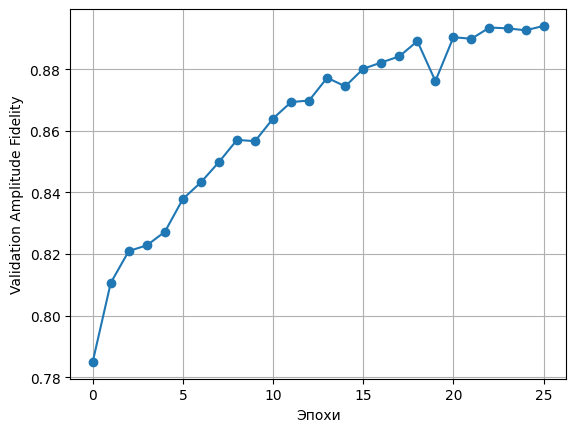

In [ ]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
log_dir = 'logs/model6/lightning_logs/version_0/'
event_file = [
    os.path.join(log_dir, file_name)
    for file_name in os.listdir(log_dir)
    if file_name.startswith("events.out.tfevents")
]
event_file = event_file[0]
ea = event_accumulator.EventAccumulator(event_file)
ea.Reload()
tags = ea.Tags()['scalars']
val_r2_values = ea.Scalars('val/fidelity')
epochs = ea.Scalars('epoch')
eps = [x.value for x in epochs][::]
eps = list(set(eps))
eps.sort()
values = [x.value for x in val_r2_values][::]
plt.plot(eps[:-1], values, marker='o', linestyle='-')
plt.xlabel('Эпохи')
plt.ylabel('Validation Amplitude Fidelity')
plt.grid(True)
plt.savefig('graph.pdf')
plt.show()

Доступные метрики: ['loss/train', 'epoch', 'loss/val', 'val/fidelity']


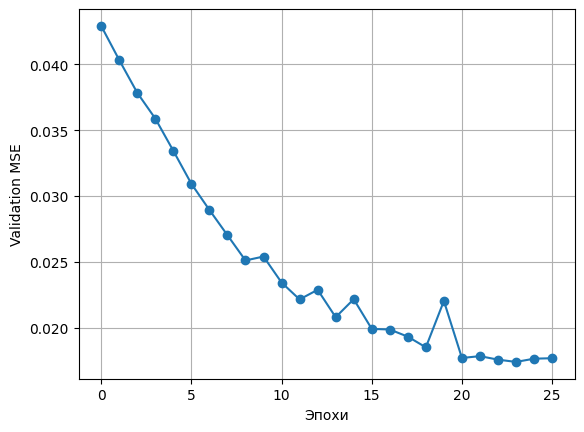

In [ ]:
log_dir = 'logs/model6/lightning_logs/version_0/'
event_file = [
    os.path.join(log_dir, file_name)
    for file_name in os.listdir(log_dir)
    if file_name.startswith("events.out.tfevents")
]
event_file = event_file[0]
ea = event_accumulator.EventAccumulator(event_file)
ea.Reload()
tags = ea.Tags()['scalars']
val_r2_values = ea.Scalars('loss/val')
epochs = ea.Scalars('epoch')
eps = [x.value for x in epochs][::]
eps = list(set(eps))
eps.sort()
values = [x.value for x in val_r2_values]
plt.plot(eps[:-1], values, marker='o', linestyle='-')
plt.xlabel('Эпохи')
plt.ylabel('Validation MSE')
plt.grid(True)
plt.savefig('graph.pdf')
plt.show()